In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import jax.numpy as jnp
import multihist as mh

import appletree as apt
from appletree import randgen
from appletree import Parameter
from appletree.components import ERBand

In [2]:
apt.set_gpu_memory_usage(0.2)

# Define context

In [3]:
tree = ERBand()

In [4]:
tree.deduce(
    data_names = ['cs1', 'cs2', 'eff'],
    func_name = 'simulate',
)
tree.compile()

# Parameters

In [5]:
par_manager = Parameter('./appletree/parameters/apt_sr0_er.json')
par_manager.sample_init()
parameters = par_manager.get_all_parameter()

# Simulation

In [6]:
batch_size = int(1e6)
key = randgen.get_key(seed=137)

key, (cs1, cs2, eff) = tree.simulate(key, batch_size, parameters)

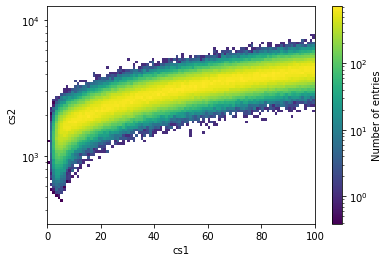

In [7]:
h, be = jnp.histogramdd(
    jnp.asarray([cs1, cs2]).T,
    bins=(jnp.linspace(0, 100, 101), jnp.logspace(2.5, 4.1, 81)),
    weights=eff
)

h = mh.Histdd.from_histogram(
    np.array(h), 
    be, 
    axis_names=['cs1', 'cs2']
)
h.plot(norm=LogNorm())
plt.yscale('log')
plt.show()

# Simulation and make equiprob hist

In [8]:
data = pd.read_csv('./appletree/data/data_XENONnT_Rn220_v8_strax_v1.2.2_straxen_v1.7.1_cutax_v1.9.0.csv')
bins_cs1, bins_cs2 = apt.utils.get_equiprob_bins_2d(
    data[['cs1', 'cs2']].to_numpy(),
    [15, 15],
    order=[0, 1],
    x_clip=[0, 100],
    y_clip=[1e2, 1e4],
    which_np=jnp
)

In [9]:
tree.deduce(
    data_names = ['cs1', 'cs2', 'eff'],
    func_name = 'simulate',
    bins = [bins_cs1, bins_cs2],
    bins_type = 'irreg'
)
tree.compile()

/home/zihaoxu/appletree/appletree/component.py:196: UserWarning: function name simulate is already cached. Running compile() will overwrite it.
  warn(warning)


In [10]:
batch_size = int(1e6)
key = randgen.get_key(seed=137)
key, h = tree.simulate_hist(key, int(1e6), parameters)

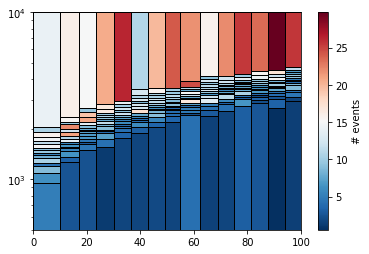

In [11]:
apt.utils.plot_irreg_histogram_2d(bins_cs1, bins_cs2, h, density=False)
plt.yscale('log')
plt.ylim(5e2, 1e4)
plt.show()

# Speed test

In [12]:
@apt.utils.timeit
def test(key, batch_size, parameters):
    return tree.simulate_hist(key, batch_size, parameters)

In [13]:
@apt.utils.timeit
def benchmark():
    key = randgen.get_key()
    for _ in range(100):
        key, _ = test(key, int(1e6), parameters)

In [14]:
benchmark()

 Function <benchmark> starts. 
 Function <test> starts. 
 Function <test> ends! Time cost = 4.225254 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 4.340410 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 3.981829 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 3.807545 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 4.450798 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.415844 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.502390 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.524801 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.372929 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.526232 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.426811 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.468058 msec. 
 Function <test> starts. 
 Function <test> en